Group members:
    1. Nshuti Alain Parfait

Question 1.

In [31]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [4]:
path = "diabetes.csv"
diabetes = pd.read_csv(path)

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


Question 2.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

Question 3.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=0)

In [11]:
tree= DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

Question 4.

In [37]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=feature_names, impurity=False, filled=True)


In [40]:
! dot -Tpng tree.dot -o tree.png

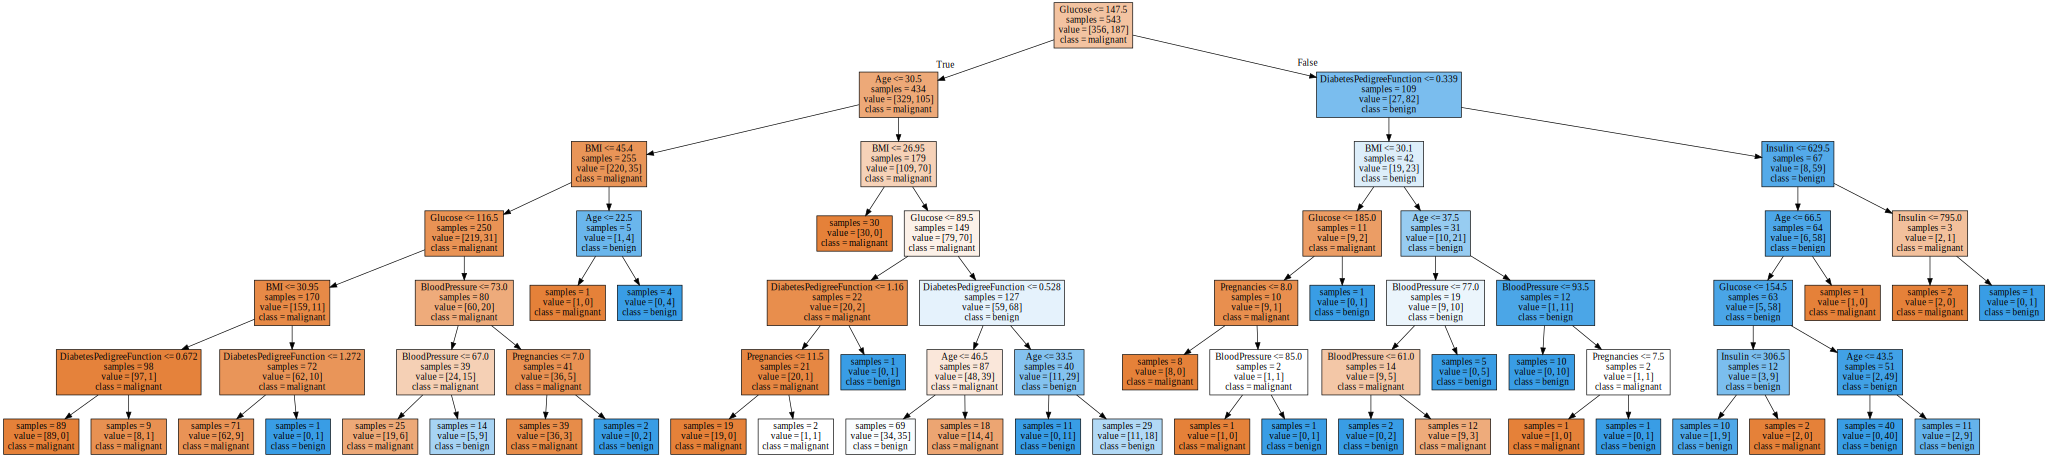

In [42]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

Question 5.

In [15]:
print("Accuracy on Training set: {:.3f}".format(tree.score(X_train, y_train)));
print("Accuracy on Test set: {:.3f}".format(tree.score(X_test, y_test)));

Accuracy on Training set: 0.853
Accuracy on Test set: 0.685


Question 6.

In [19]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
result=tree.predict([[3, 125, 68, 30, 120, 37, 0.4, 28]])

In [18]:
print(result)

[1]
